![test](https://memegenerator.net/img/instances/73066392/we-wants-it-we-needs-it-must-have-the-precious.jpg)

# A brief analysis of global Gold & Silver _export / import_ flows (in kg) [1988-2017]

   - ## Source data (July 2018): [data.un.org](http://data.un.org/Data.aspx?d=ComTrade&f=_l1Code%3a72)
   - ## In unwrought & semi-manufactured forms
   - ## Analysis does _not_ include export / import numbers for:
       - ## Waste / scrap
       - ## Jewelry

## Import modules and enable the display of matplotlib plots in this Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Read downloaded CSV data into a DataFrame

In [2]:
the_precious = pd.read_csv('UNdata_Export_20180713_021428333.csv')

## Assign specific labels of interest in the 'Commodity' column to variables

In [3]:
# Silver
ag_semi_manufactured = 'Silver semi-manufactured including gold/platinum plat'
ag_unwrought = 'Silver in unwrought forms'

# Gold
au_semi_manufactured = 'Gold, semi-manufactured forms, non-monetary'
au_unwrought = 'Gold in unwrought forms non-monetary'

## Build _Silver_ net exports DataFrame

In [4]:
ag_ex_im = the_precious[(the_precious['Commodity'] == ag_semi_manufactured) | \
                        (the_precious['Commodity'] == ag_unwrought)]

In [5]:
# Initial Silver export/import DataFrame
ag_ex_im

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Albania,2016,Silver semi-manufactured including gold/platin...,Export,128317.0,291.0,Weight in kilograms,291.0
6,Albania,2015,Silver semi-manufactured including gold/platin...,Import,5787.0,22.0,Weight in kilograms,22.0
10,Albania,2014,Silver semi-manufactured including gold/platin...,Import,81393.0,230.0,Weight in kilograms,230.0
13,Albania,2013,Silver in unwrought forms,Import,298406.0,556.0,Weight in kilograms,556.0
14,Albania,2013,Silver in unwrought forms,Export,3190.0,6.0,Weight in kilograms,6.0
15,Albania,2013,Silver semi-manufactured including gold/platin...,Import,197616.0,2771.0,Weight in kilograms,2771.0
16,Albania,2013,Silver semi-manufactured including gold/platin...,Export,1.0,191.0,Weight in kilograms,191.0
26,Albania,2012,Silver semi-manufactured including gold/platin...,Import,172567.0,2768.0,Weight in kilograms,2768.0
27,Albania,2012,Silver semi-manufactured including gold/platin...,Export,4448.0,179.0,Weight in kilograms,179.0
37,Albania,2011,Silver semi-manufactured including gold/platin...,Import,291206.0,4485.0,Weight in kilograms,4485.0


In [6]:
# Make a copy of the original DataFrame
ag_ex_im_copy = ag_ex_im.copy()

# Multiply 'Import' values by -1, rename 'Import' to 'Export', then sum all the 'Export' values
ag_ex_im_copy.loc[ag_ex_im_copy['Flow'] == 'Import', \
                  ('Trade (USD)', 'Weight (kg)', 'Quantity')] = ag_ex_im_copy * -1
ag_ex_im_copy.loc[ag_ex_im_copy['Flow'] == 'Import', ('Flow')] = 'Export'
ag_net_ex = ag_ex_im_copy[ag_ex_im_copy['Flow'] == 'Export']
ag_net_ex = ag_net_ex.groupby(['Country or Area', 'Year']).sum()

# Silver net exports DataFrame after cleaning and sorting by year, weight
ag_net_ex_sorted = ag_net_ex.sort_values(by=['Year', 'Weight (kg)'], ascending=False)
ag_net_ex_sorted

,,Trade (USD),Weight (kg),Quantity
Country or Area,Year,,,
"China, Hong Kong SAR",2017,2.204822e+09,3.457296e+06,3.457296e+06
Rep. of Korea,2017,1.256705e+09,2.593722e+06,2.593722e+06
Mexico,2017,1.919281e+09,2.466352e+06,2.466352e+06
Germany,2017,6.348765e+08,1.269030e+06,1.269030e+06
Poland,2017,6.389999e+08,1.167008e+06,1.167008e+06
Kazakhstan,2017,5.379492e+08,1.036102e+06,1.036102e+06
Canada,2017,4.195222e+08,9.768633e+05,9.768633e+05
Russian Federation,2017,4.147146e+08,7.716267e+05,7.716267e+05
Switzerland,2017,3.883713e+08,7.187960e+05,7.187960e+05


## Build _Gold_ net exports DataFrame

In [7]:
au_ex_im = the_precious[(the_precious['Commodity'] == au_semi_manufactured) | \
                        (the_precious['Commodity'] == au_unwrought)]

In [8]:
# Initial Gold export/import DataFrame
au_ex_im

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
1,Albania,2016,"Gold, semi-manufactured forms, non-monetary",Export,8.162630e+05,23.0,Weight in kilograms,23.0
17,Albania,2013,Gold in unwrought forms non-monetary,Import,6.383500e+04,1.0,Weight in kilograms,1.0
18,Albania,2013,"Gold, semi-manufactured forms, non-monetary",Export,7.634720e+05,21.0,Weight in kilograms,21.0
28,Albania,2012,Gold in unwrought forms non-monetary,Import,2.613990e+05,5.0,Weight in kilograms,5.0
29,Albania,2012,Gold in unwrought forms non-monetary,Export,8.080000e+02,0.0,Weight in kilograms,0.0
30,Albania,2012,"Gold, semi-manufactured forms, non-monetary",Export,1.558090e+05,4.0,Weight in kilograms,4.0
39,Albania,2011,Gold in unwrought forms non-monetary,Import,3.355930e+05,6.0,Weight in kilograms,6.0
40,Albania,2011,"Gold, semi-manufactured forms, non-monetary",Import,2.663700e+04,0.0,Weight in kilograms,0.0
41,Albania,2011,"Gold, semi-manufactured forms, non-monetary",Export,6.906050e+05,19.0,Weight in kilograms,19.0
49,Albania,2010,Gold in unwrought forms non-monetary,Import,5.890700e+04,1.0,Weight in kilograms,1.0


In [9]:
# Make a copy of the original DataFrame
au_ex_im_copy = au_ex_im.copy()

# Multiply 'Import' values by -1, rename 'Import' to 'Export', then sum all the 'Export' values
au_ex_im_copy.loc[au_ex_im_copy['Flow'] == 'Import', \
                  ('Trade (USD)', 'Weight (kg)', 'Quantity')] = au_ex_im_copy * -1
au_ex_im_copy.loc[au_ex_im_copy['Flow'] == 'Import', ('Flow')] = 'Export'
au_net_ex = au_ex_im_copy[au_ex_im_copy['Flow'] == 'Export']
au_net_ex = au_net_ex.groupby(['Country or Area', 'Year']).sum()

# Gold net exports DataFrame after cleaning and sorting by year, weight
au_net_ex_sorted = au_net_ex.sort_values(by=['Year', 'Weight (kg)'], ascending=False)
au_net_ex_sorted

,,Trade (USD),Weight (kg),Quantity
Country or Area,Year,,,
Mexico,2017,4.323667e+09,2.442333e+06,309520.600646
"China, Hong Kong SAR",2017,2.283319e+10,4.623130e+05,462312.985701
Argentina,2017,2.259823e+09,4.362553e+05,436255.300000
Canada,2017,7.736153e+09,3.463063e+05,111545.108000
USA,2017,8.679673e+09,2.249311e+05,224931.057134
Japan,2017,8.262663e+09,2.098510e+05,0.000000
Suriname,2017,1.054287e+09,1.872711e+05,187271.110000
South Africa,2017,4.682680e+09,1.192699e+05,0.000000
Brazil,2017,2.796435e+09,7.535840e+04,74561.404921


## Visualizing the Data

## 1. Net _export_ data/plots for Gold & Silver

In [10]:
total_ag_net_ex_by_year = []
total_au_net_ex_by_year = []

for year, ag_ex_df in ag_net_ex.groupby(level=1):
    ag_ex_df_2 = ag_ex_df[ag_ex_df['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False)
    total_ag_net_ex = ag_ex_df_2['Weight (kg)'].sum()
    total_ag_net_ex_by_year.append((year, total_ag_net_ex))
    
for year, au_ex_df in au_net_ex.groupby(level=1):
    au_ex_df_2 = au_ex_df[au_ex_df['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False)
    total_au_net_ex = au_ex_df_2['Weight (kg)'].sum()
    total_au_net_ex_by_year.append((year, total_au_net_ex))
    
total_ag_net_ex_df = pd.DataFrame(total_ag_net_ex_by_year, columns=['Year', 'Total Net Exports'])
total_au_net_ex_df = pd.DataFrame(total_au_net_ex_by_year, columns=['Year', 'Total Net Exports'])

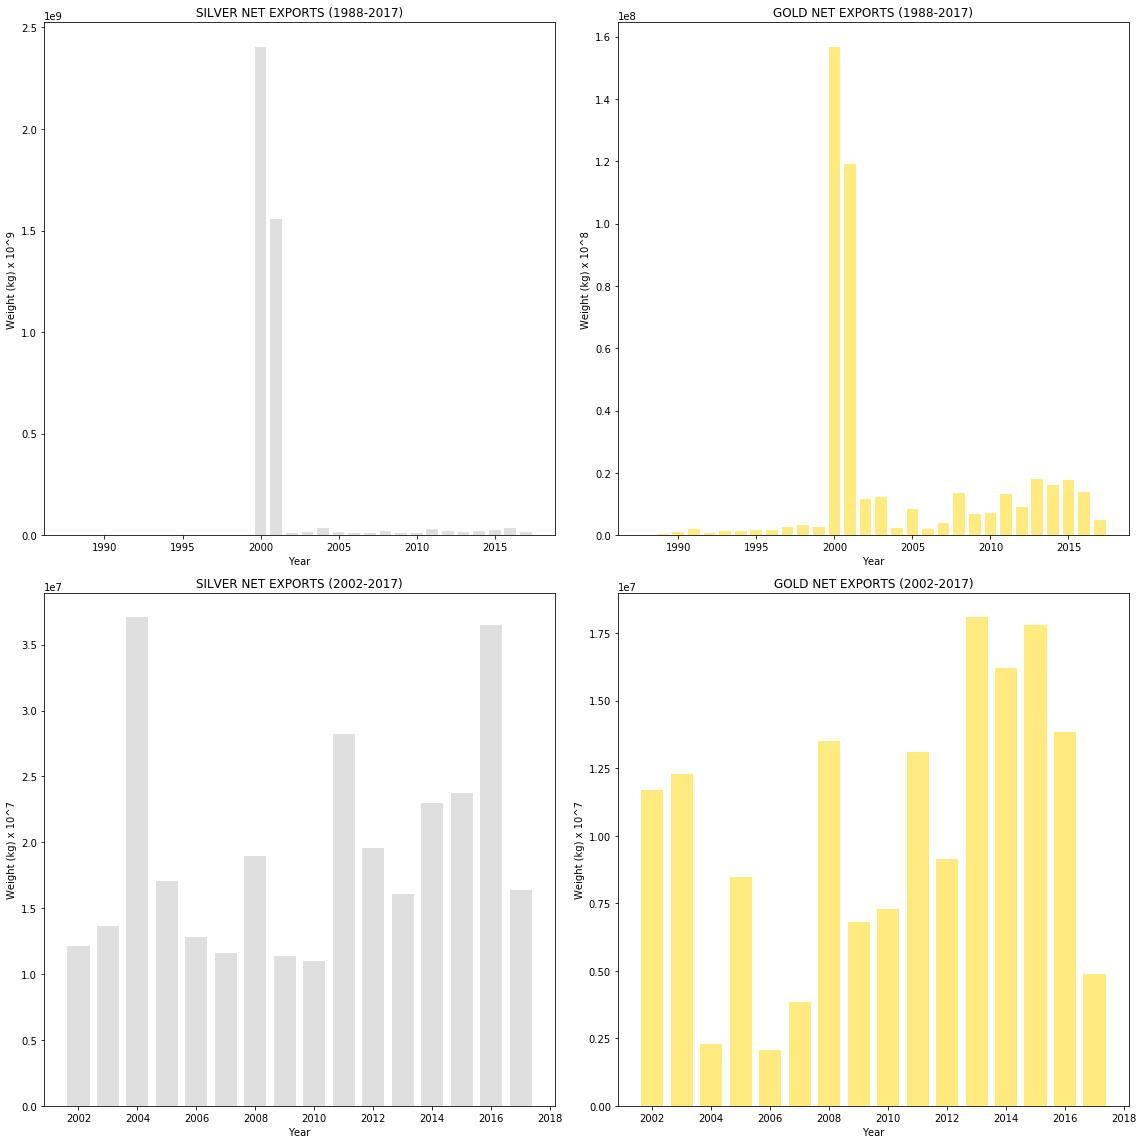

In [11]:
# The plots below show net export totals for the years 2000 & 2001 to be interesting outliers
# No 'Weight (kg)' data exists in the dataset for Silver before the year 2000

# Silver net export x,y variables
ag_x = total_ag_net_ex_df['Year']
ag_y = total_ag_net_ex_df['Total Net Exports']

ag_x_2002_2017 = total_ag_net_ex_df[total_ag_net_ex_df['Year'] >= 2002]['Year']
ag_y_2002_2017 = total_ag_net_ex_df[total_ag_net_ex_df['Year'] >= 2002]['Total Net Exports']

# Gold net export x,y variables
au_x = total_au_net_ex_df['Year']
au_y = total_au_net_ex_df['Total Net Exports']

au_x_2002_2017 = total_au_net_ex_df[total_au_net_ex_df['Year'] >= 2002]['Year']
au_y_2002_2017 = total_au_net_ex_df[total_au_net_ex_df['Year'] >= 2002]['Total Net Exports']

# Make subplots canvas
fig, axes = plt.subplots(2, 2, figsize=(16,16))

# 2000, 2001 outliers included
axes[0,0].bar(ag_x, ag_y, align='center', width=0.75, alpha=0.5, color='silver')
axes[0,0].set_title('SILVER NET EXPORTS (1988-2017)')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Weight (kg) x 10^9')

axes[0,1].bar(au_x, au_y, align='center', width=0.75, alpha=0.5, color='gold')
axes[0,1].set_title('GOLD NET EXPORTS (1988-2017)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Weight (kg) x 10^8')

# only includes data from 2002-2017; 2001, 2002 are outliers excluded
axes[1,0].bar(ag_x_2002_2017, ag_y_2002_2017, align='center', width=0.75, alpha=0.5, color='silver')
axes[1,0].set_title('SILVER NET EXPORTS (2002-2017)')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Weight (kg) x 10^7')

axes[1,1].bar(au_x_2002_2017, au_y_2002_2017, align='center', width=0.75, alpha=0.5, color='gold')
axes[1,1].set_title('GOLD NET EXPORTS (2002-2017)')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Weight (kg) x 10^7')

plt.tight_layout()
plt.show()

### The Gold & Silver net _export_ plots on the _top_ both show interesting outliers for the years 2000 & 2001.  The plots on the bottom have the 2000 & 2001 outliers removed and only net _exports_ for the years 2002-2017 are displayed.  Quantity of global net _exports_ (in kg) for both Gold & Silver seems to _slightly favor_ more recent years.

## 2. Net _import_ data/plots for Gold & Silver

In [12]:
total_ag_net_im_by_year = []
total_au_net_im_by_year = []

for year, ag_im_df in ag_net_ex.groupby(level=1):
    ag_im_df_2 = ag_im_df[ag_im_df['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=False)
    total_ag_net_im = ag_im_df_2['Weight (kg)'].sum()
    total_ag_net_im_by_year.append((year, total_ag_net_im))
    
for year, au_im_df in au_net_ex.groupby(level=1):
    au_im_df_2 = au_im_df[au_im_df['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=False)
    total_au_net_im = au_im_df_2['Weight (kg)'].sum()
    total_au_net_im_by_year.append((year, total_au_net_im))
    
total_ag_net_im_df = pd.DataFrame(total_ag_net_im_by_year, columns=['Year', 'Total Net Imports'])
total_au_net_im_df = pd.DataFrame(total_au_net_im_by_year, columns=['Year', 'Total Net Imports'])

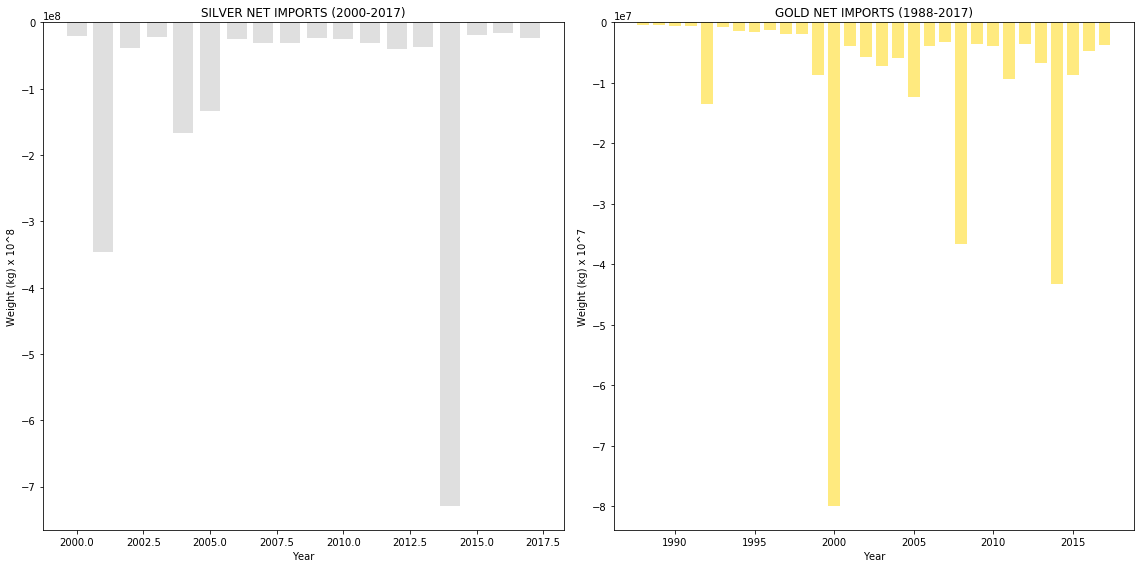

In [13]:
# The plots below show net import totals for the years 2000 & 2001 to be interesting outliers
# No 'Weight (kg)' data exists in the dataset for Silver before the year 2000

# Silver net import x,y variables
ag_x_2000_2017 = total_ag_net_im_df[total_ag_net_im_df['Year'] >= 2000]['Year']
ag_y_2000_2017 = total_ag_net_im_df[total_ag_net_im_df['Year'] >= 2000]['Total Net Imports']

# Gold net import x,y variables
au_x = total_au_net_im_df['Year']
au_y = total_au_net_im_df['Total Net Imports']

au_x_2002_2017 = total_au_net_im_df[total_au_net_im_df['Year'] >= 2002]['Year']
au_y_2002_2017 = total_au_net_im_df[total_au_net_im_df['Year'] >= 2002]['Total Net Imports']

# Make subplots canvas
fig, axes2 = plt.subplots(1, 2, figsize=(16,8))

axes2[0].bar(ag_x_2000_2017, ag_y_2000_2017, align='center', width=0.75, alpha=0.5, color='silver')
axes2[0].set_title('SILVER NET IMPORTS (2000-2017)')
axes2[0].set_xlabel('Year')
axes2[0].set_ylabel('Weight (kg) x 10^8')

axes2[1].bar(au_x, au_y, align='center', width=0.75, alpha=0.5, color='gold')
axes2[1].set_title('GOLD NET IMPORTS (1988-2017)')
axes2[1].set_xlabel('Year')
axes2[1].set_ylabel('Weight (kg) x 10^7')

plt.tight_layout()
plt.show()

### Outliers for Silver net _imports_ appear in the years 2001 & 2014.  Outliers for Gold net _imports_ appear in the years 2000, 2008, and 2014.

### From where do the export / import outliers originate, according to the data?

## 3.  Which countries comprise the export / import totals for the years 2000, 2001, 2008, & 2014?

In [14]:
# Silver Top 10 Net _Exporters_
ag_ex_2000 = ag_net_ex.xs(2000, level='Year')[ag_net_ex.xs(2000, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)
ag_ex_2001 = ag_net_ex.xs(2001, level='Year')[ag_net_ex.xs(2001, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)
ag_ex_2008 = ag_net_ex.xs(2008, level='Year')[ag_net_ex.xs(2008, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)
ag_ex_2014 = ag_net_ex.xs(2014, level='Year')[ag_net_ex.xs(2014, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)

# Silver Top 10 Net _Importers_
ag_im_2000 = ag_net_ex.xs(2000, level='Year')[ag_net_ex.xs(2000, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)
ag_im_2001 = ag_net_ex.xs(2001, level='Year')[ag_net_ex.xs(2001, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)
ag_im_2008 = ag_net_ex.xs(2008, level='Year')[ag_net_ex.xs(2008, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)
ag_im_2014 = ag_net_ex.xs(2014, level='Year')[ag_net_ex.xs(2014, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)

# Gold Top 10 Net _Exporters_
au_ex_2000 = au_net_ex.xs(2000, level='Year')[au_net_ex.xs(2000, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)
au_ex_2001 = au_net_ex.xs(2001, level='Year')[au_net_ex.xs(2001, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)
au_ex_2008 = au_net_ex.xs(2008, level='Year')[au_net_ex.xs(2008, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)
au_ex_2014 = au_net_ex.xs(2014, level='Year')[au_net_ex.xs(2014, level='Year')['Weight (kg)'] >= 0].sort_values(by=['Weight (kg)'], ascending=False).head(10)

# Gold Top 10 Net _Importers_
au_im_2000 = au_net_ex.xs(2000, level='Year')[au_net_ex.xs(2000, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)
au_im_2001 = au_net_ex.xs(2001, level='Year')[au_net_ex.xs(2001, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)
au_im_2008 = au_net_ex.xs(2008, level='Year')[au_net_ex.xs(2008, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)
au_im_2014 = au_net_ex.xs(2014, level='Year')[au_net_ex.xs(2014, level='Year')['Weight (kg)'] < 0].sort_values(by=['Weight (kg)'], ascending=True).head(10)

### Year 2000 - Silver (top), Gold (bottom); Exports (left), Imports (right)

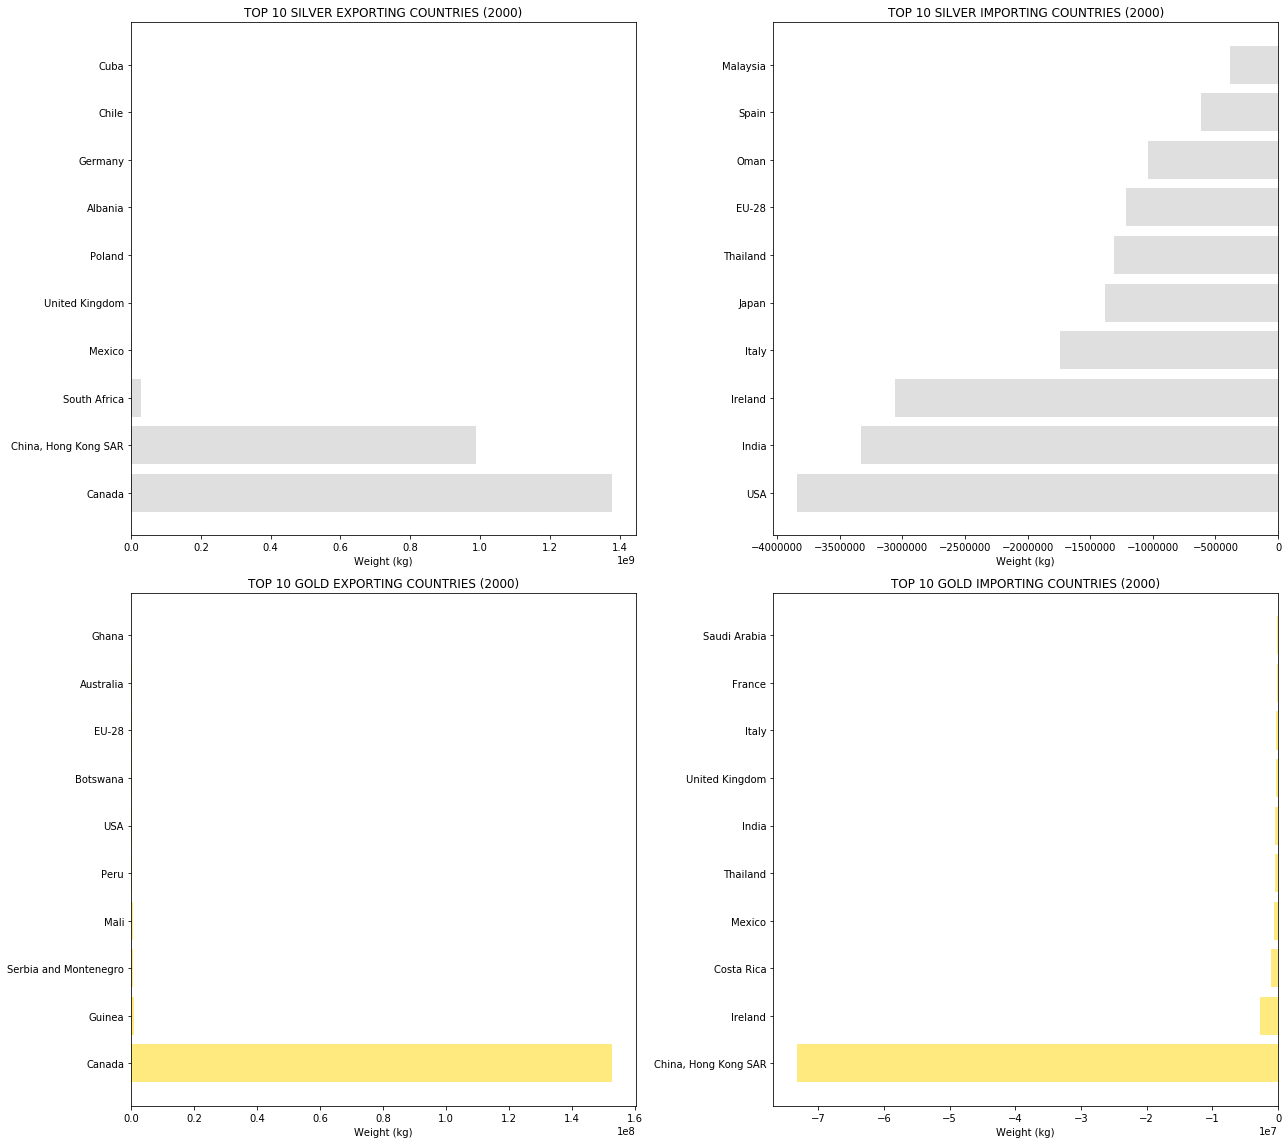

In [15]:
# Make subplots canvas
fig, axes3 = plt.subplots(2, 2, figsize=(18,16))

axes3[0,0].barh(np.arange(10), ag_ex_2000['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes3[0,0].set_yticks(np.arange(10))
axes3[0,0].set_yticklabels(ag_ex_2000.index)
axes3[0,0].set_xlabel('Weight (kg)')
axes3[0,0].set_title('TOP 10 SILVER EXPORTING COUNTRIES (2000)')

axes3[0,1].barh(np.arange(10), ag_im_2000['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes3[0,1].set_yticks(np.arange(10))
axes3[0,1].set_yticklabels(ag_im_2000.index)
axes3[0,1].set_xlabel('Weight (kg)')
axes3[0,1].set_title('TOP 10 SILVER IMPORTING COUNTRIES (2000)')

axes3[1,0].barh(np.arange(10), au_ex_2000['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes3[1,0].set_yticks(np.arange(10))
axes3[1,0].set_yticklabels(au_ex_2000.index)
axes3[1,0].set_xlabel('Weight (kg)')
axes3[1,0].set_title('TOP 10 GOLD EXPORTING COUNTRIES (2000)')

axes3[1,1].barh(np.arange(10), au_im_2000['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes3[1,1].set_yticks(np.arange(10))
axes3[1,1].set_yticklabels(au_im_2000.index)
axes3[1,1].set_xlabel('Weight (kg)')
axes3[1,1].set_title('TOP 10 GOLD IMPORTING COUNTRIES (2000)')

plt.tight_layout()

### In the year 2000, Canada appears to have _exported_ extremely large quantities of both gold and silver.  China / Hong Kong appears to have _exported_ a large quantity of silver but _imported_ a large quantity of gold.

### Year 2001 - Silver (top), Gold (bottom); Exports (left), Imports (right)

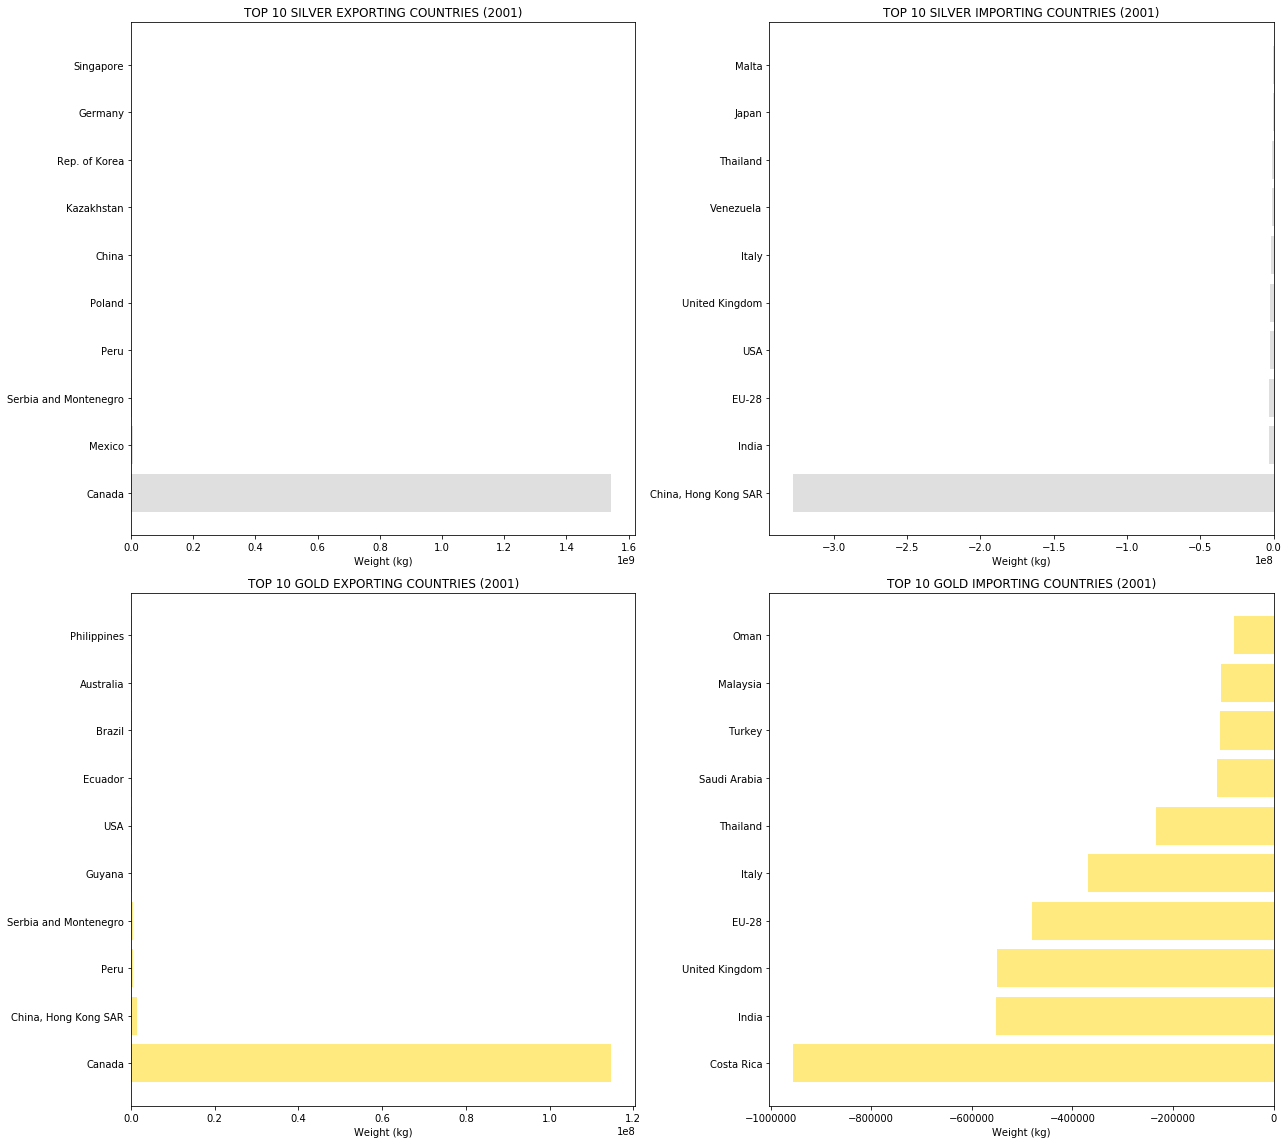

In [16]:
# Make subplots canvas
fig, axes4 = plt.subplots(2, 2, figsize=(18,16))

axes4[0,0].barh(np.arange(10), ag_ex_2001['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes4[0,0].set_yticks(np.arange(10))
axes4[0,0].set_yticklabels(ag_ex_2001.index)
axes4[0,0].set_xlabel('Weight (kg)')
axes4[0,0].set_title('TOP 10 SILVER EXPORTING COUNTRIES (2001)')

axes4[0,1].barh(np.arange(10), ag_im_2001['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes4[0,1].set_yticks(np.arange(10))
axes4[0,1].set_yticklabels(ag_im_2001.index)
axes4[0,1].set_xlabel('Weight (kg)')
axes4[0,1].set_title('TOP 10 SILVER IMPORTING COUNTRIES (2001)')

axes4[1,0].barh(np.arange(10), au_ex_2001['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes4[1,0].set_yticks(np.arange(10))
axes4[1,0].set_yticklabels(au_ex_2001.index)
axes4[1,0].set_xlabel('Weight (kg)')
axes4[1,0].set_title('TOP 10 GOLD EXPORTING COUNTRIES (2001)')

axes4[1,1].barh(np.arange(10), au_im_2001['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes4[1,1].set_yticks(np.arange(10))
axes4[1,1].set_yticklabels(au_im_2001.index)
axes4[1,1].set_xlabel('Weight (kg)')
axes4[1,1].set_title('TOP 10 GOLD IMPORTING COUNTRIES (2001)')

plt.tight_layout()

### In the year 2001, Canada (again) appears to have _exported_ extremely large quantities of both gold and silver.  China / Hong Kong appears to have _imported_ a large quantity of silver, where it had previously _exported_ a large quantity in 2000.  Interestingly, Costa Rica appears to be the largest _importer_ of gold in 2001 (and was also the 3rd largest _importer_ in 2000).

### Year 2008 - Silver (top), Gold (bottom); Exports (left), Imports (right)

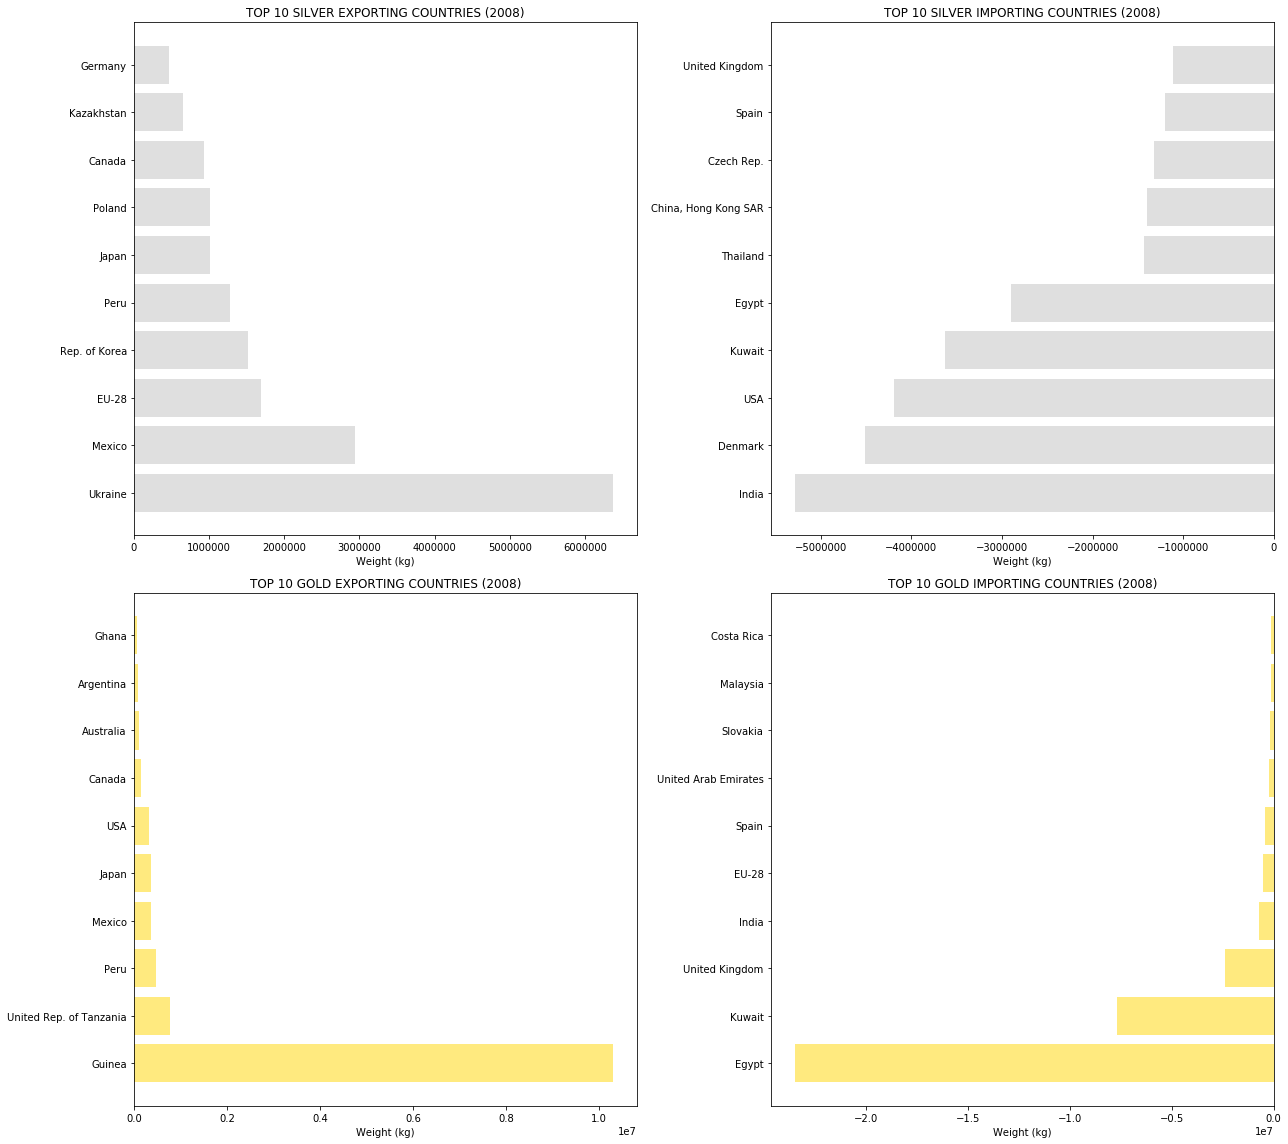

In [17]:
# Make subplots canvas
fig, axes5 = plt.subplots(2, 2, figsize=(18,16))

axes5[0,0].barh(np.arange(10), ag_ex_2008['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes5[0,0].set_yticks(np.arange(10))
axes5[0,0].set_yticklabels(ag_ex_2008.index)
axes5[0,0].set_xlabel('Weight (kg)')
axes5[0,0].set_title('TOP 10 SILVER EXPORTING COUNTRIES (2008)')

axes5[0,1].barh(np.arange(10), ag_im_2008['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes5[0,1].set_yticks(np.arange(10))
axes5[0,1].set_yticklabels(ag_im_2008.index)
axes5[0,1].set_xlabel('Weight (kg)')
axes5[0,1].set_title('TOP 10 SILVER IMPORTING COUNTRIES (2008)')

axes5[1,0].barh(np.arange(10), au_ex_2008['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes5[1,0].set_yticks(np.arange(10))
axes5[1,0].set_yticklabels(au_ex_2008.index)
axes5[1,0].set_xlabel('Weight (kg)')
axes5[1,0].set_title('TOP 10 GOLD EXPORTING COUNTRIES (2008)')

axes5[1,1].barh(np.arange(10), au_im_2008['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes5[1,1].set_yticks(np.arange(10))
axes5[1,1].set_yticklabels(au_im_2008.index)
axes5[1,1].set_xlabel('Weight (kg)')
axes5[1,1].set_title('TOP 10 GOLD IMPORTING COUNTRIES (2008)')

plt.tight_layout()

### In 2008, Guinea appears to have been the largest _exporter_ of gold while Egypt was gold's largest _importer_.

### Year 2014 - Silver (top), Gold (bottom); Exports (left), Imports (right)

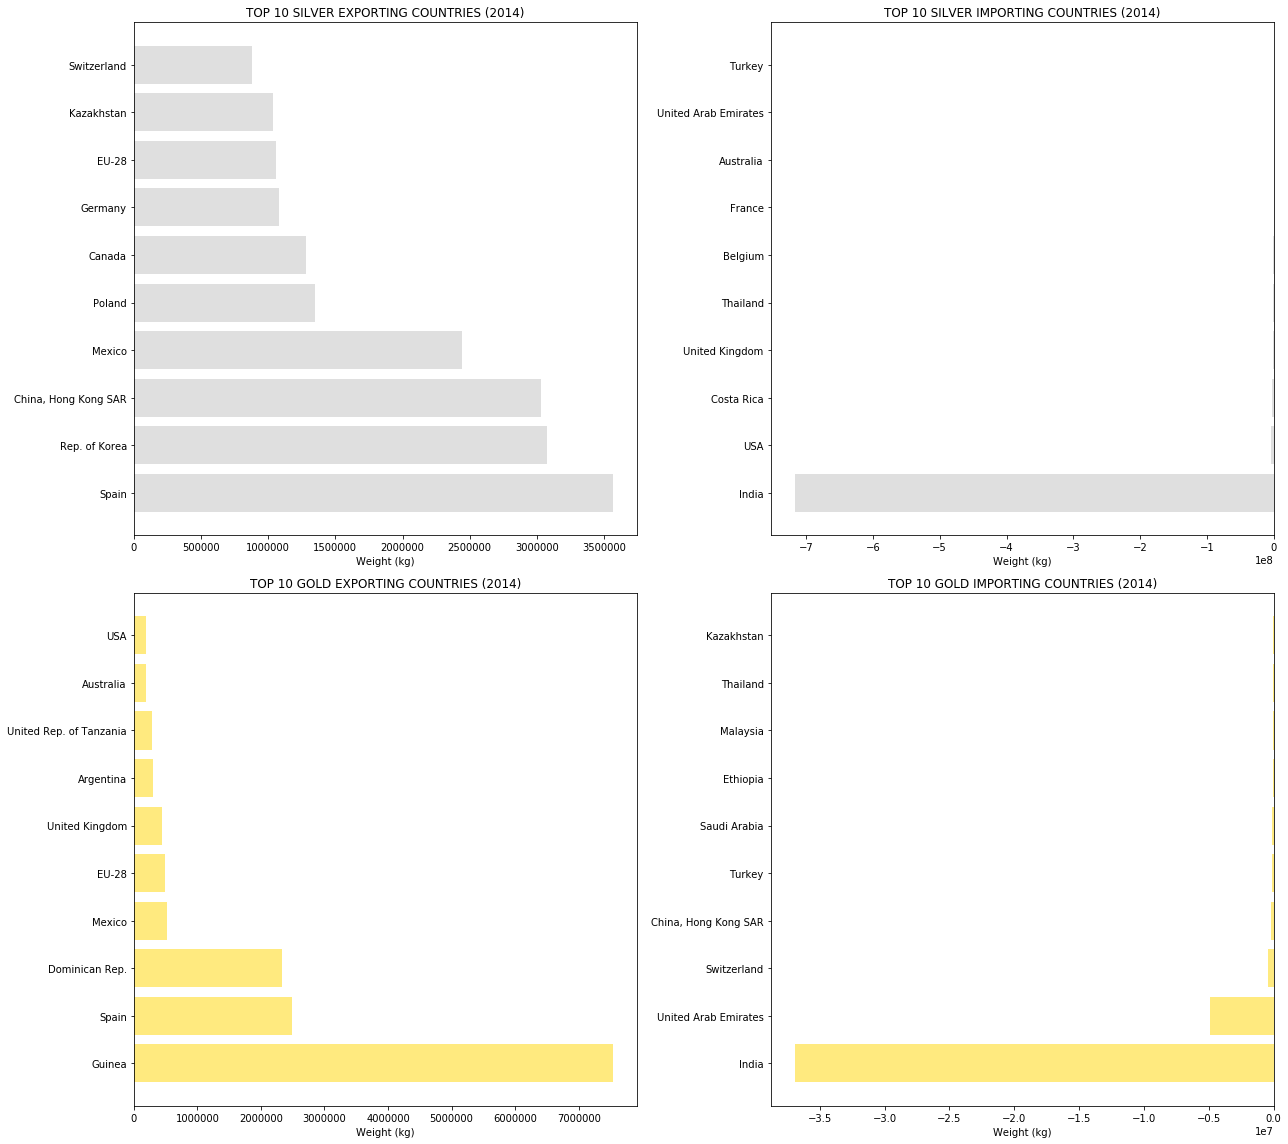

In [18]:
# Make subplots canvas
fig, axes6 = plt.subplots(2, 2, figsize=(18,16))

axes6[0,0].barh(np.arange(10), ag_ex_2014['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes6[0,0].set_yticks(np.arange(10))
axes6[0,0].set_yticklabels(ag_ex_2014.index)
axes6[0,0].set_xlabel('Weight (kg)')
axes6[0,0].set_title('TOP 10 SILVER EXPORTING COUNTRIES (2014)')

axes6[0,1].barh(np.arange(10), ag_im_2014['Weight (kg)'], align='center', alpha=0.5, color='silver')
axes6[0,1].set_yticks(np.arange(10))
axes6[0,1].set_yticklabels(ag_im_2014.index)
axes6[0,1].set_xlabel('Weight (kg)')
axes6[0,1].set_title('TOP 10 SILVER IMPORTING COUNTRIES (2014)')

axes6[1,0].barh(np.arange(10), au_ex_2014['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes6[1,0].set_yticks(np.arange(10))
axes6[1,0].set_yticklabels(au_ex_2014.index)
axes6[1,0].set_xlabel('Weight (kg)')
axes6[1,0].set_title('TOP 10 GOLD EXPORTING COUNTRIES (2014)')

axes6[1,1].barh(np.arange(10), au_im_2014['Weight (kg)'], align='center', alpha=0.5, color='gold')
axes6[1,1].set_yticks(np.arange(10))
axes6[1,1].set_yticklabels(au_im_2014.index)
axes6[1,1].set_xlabel('Weight (kg)')
axes6[1,1].set_title('TOP 10 GOLD IMPORTING COUNTRIES (2014)')

plt.tight_layout()

### In 2014, Guinea (as in 2008) appears to have been the largest _exporter_ of gold.  India was overwhelmingly the largest _importer_ of both gold and silver.

### _India_ appears as a Top 10 _importer_ of both gold and silver for _all_ of the years displayed above.

## 4. Since 2000, how much (by weight in kg) gold and silver has India imported?

In [19]:
india_ag_im_kg_2000_2017 = ag_net_ex.xs('India').tail(18)
india_ag_im_total_kg = india_ag_im_kg_2000_2017['Weight (kg)'].sum() * -1

india_au_im_kg_2000_2017 = au_net_ex.xs('India').tail(18)
india_au_im_total_kg = india_au_im_kg_2000_2017['Weight (kg)'].sum() * -1

In [20]:
pie_chart_labels = 'Silver', 'Gold'
pie_chart_data = [india_ag_im_total_kg, india_au_im_total_kg]
pie_chart_colors = ['silver', 'gold']

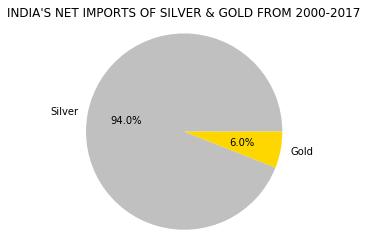

From 2000-2017, India imported (net):
	- 775593124 kg of silver.
	- 49387687 kg of gold.
	- silver to gold at a ratio of 15.7:1.


In [21]:
fig, axes7 = plt.subplots()

axes7.pie(pie_chart_data, labels=pie_chart_labels, colors=pie_chart_colors, autopct='%1.1f%%')
axes7.set_title('INDIA\'S NET IMPORTS OF SILVER & GOLD FROM 2000-2017')
axes7.axis('equal')

plt.show()

print('From 2000-2017, India imported (net):')
print('\t- {} kg of silver.'.format(int(india_ag_im_total_kg)))
print('\t- {} kg of gold.'.format(int(india_au_im_total_kg)))
print('\t- silver to gold at a ratio of {}:1.'.format(str(india_ag_im_total_kg/india_au_im_total_kg)[:4]))

## 5. From 1988-2017, what does the history of India's net imports of gold look like?

In [22]:
years = np.array(au_net_ex.xs('India')['Weight (kg)'].index)
au_kg = np.array(au_net_ex.xs('India')['Weight (kg)']) * -1

years_2014_outlier_removed = np.array(list(years)[:-4] + list(years)[-3:])
au_kg_2014_outlier_removed = np.array(list(au_kg)[:-4] + list(au_kg)[-3:])

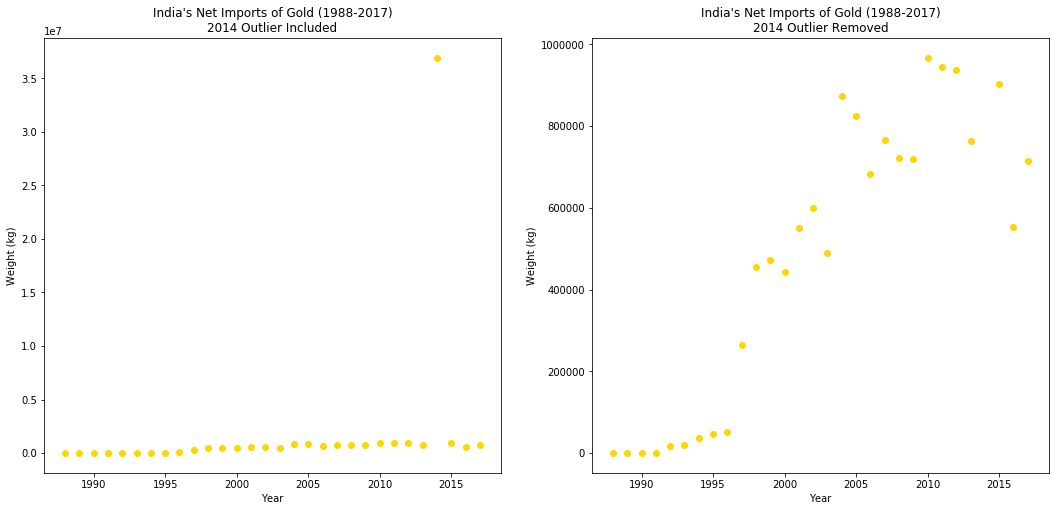

In [23]:
fig, axes8 = plt.subplots(1, 2, figsize=(18,8))

axes8[0].scatter(years, au_kg, color='gold')
axes8[0].set_xlabel('Year')
axes8[0].set_ylabel('Weight (kg)')
axes8[0].set_title('India\'s Net Imports of Gold (1988-2017)\n2014 Outlier Included')

axes8[1].scatter(years_2014_outlier_removed, au_kg_2014_outlier_removed, color='gold')
axes8[1].set_xlabel('Year')
axes8[1].set_ylabel('Weight (kg)')
axes8[1].set_title('India\'s Net Imports of Gold (1988-2017)\n2014 Outlier Removed')

plt.show()

### If included in a scatter plot, the exceptionally large amount of gold imported in 2014 makes it difficult to put the rest of the data points into perspective.  Therefore, it was omitted from the plot on the right.

### The dataset shows meaningful gold net imports apparently starting around 1992, and significantly growing in size starting around 1997.